In [9]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from importlib import reload

from data.faces.faces_data import get_faces_dataset, get_faces_dataset_with_all_labels

import pickle
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE

import common

title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

DATASET="Faces"

In [2]:
filenames_train, filenames_test, X_train_faces, X_test_faces, y_train_faces, y_test_faces =\
get_faces_dataset_with_all_labels()

num_features = X_train_faces.shape[1]
print("Number of Features {}".format(num_features))

Number of Features 216


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


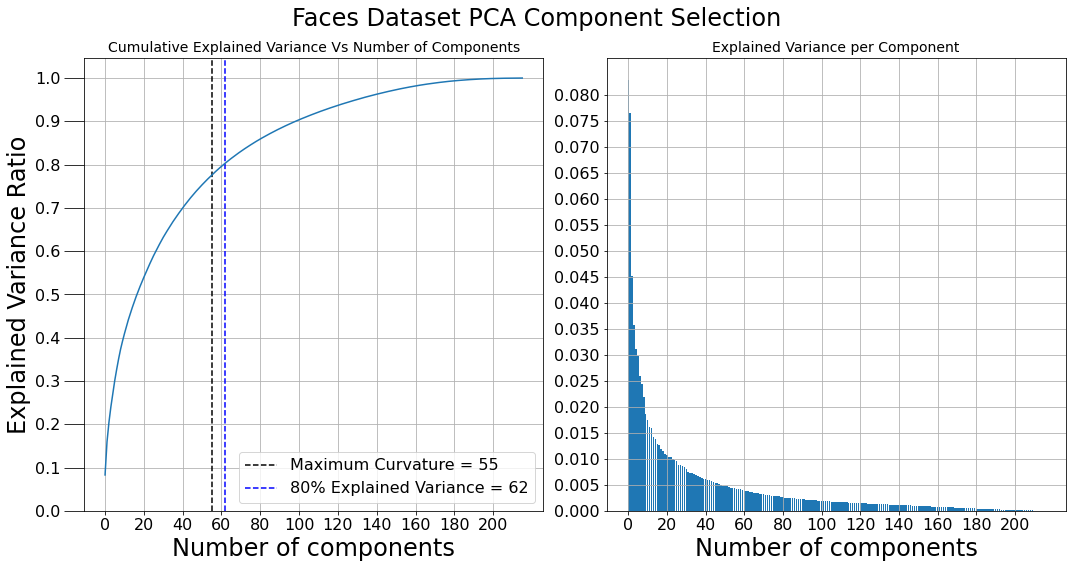

62


In [3]:
reload(common)
common.plot_pca_component_selection(X_train_faces, num_features, DATASET)

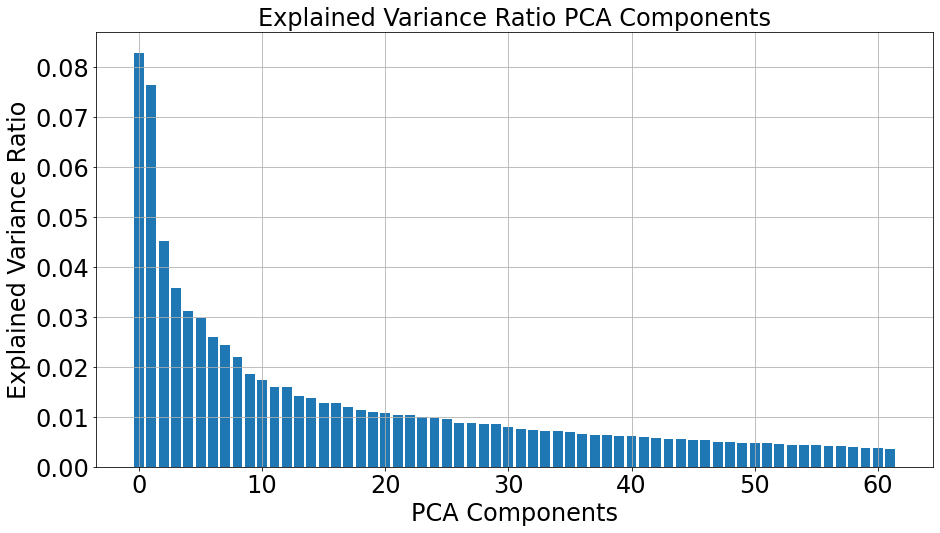

In [6]:
pca_best_num_components = 62
pca = PCA(n_components=pca_best_num_components)
pca.fit(X_train_faces)
X_train_transformed = pca.transform(X_train_faces)

plt.figure(figsize=default_figure_size)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title("Explained Variance Ratio PCA Components", fontsize=fontsize)
plt.xlabel("PCA Components", fontsize=fontsize)
plt.ylabel("Explained Variance Ratio", fontsize=fontsize)
plt.grid(True)

plt.bar(x=[i for i in range(pca.n_components)], height=pca.explained_variance_ratio_)
plt.show()

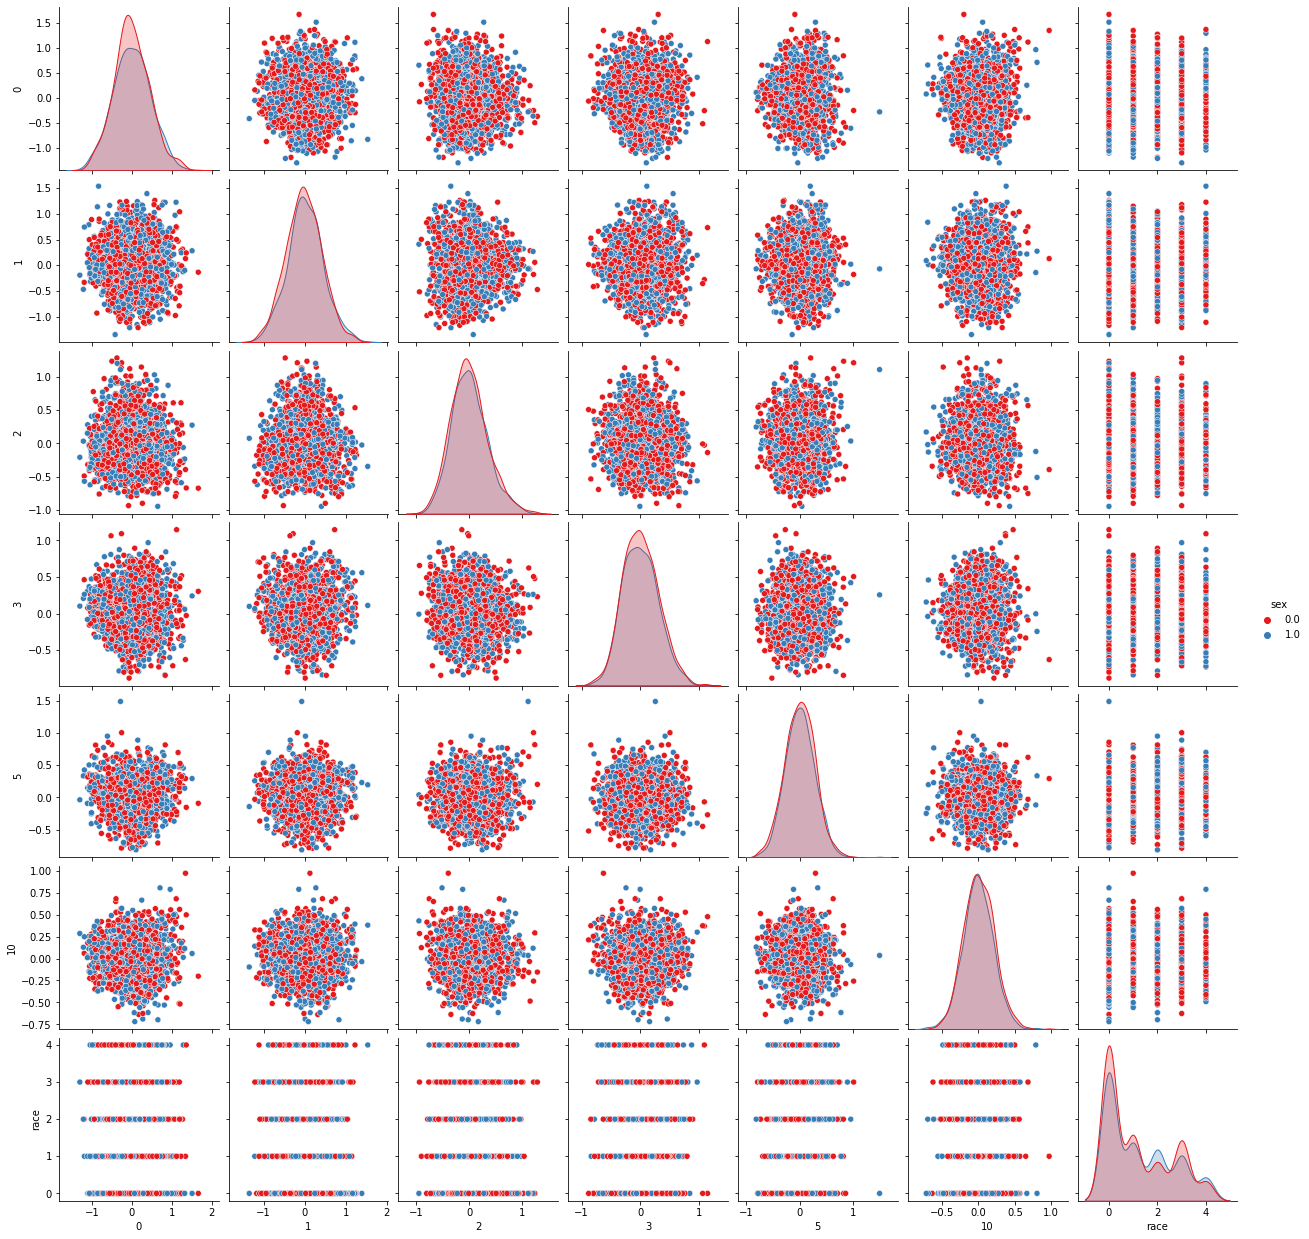

In [129]:
X_Vis = pd.DataFrame(X_train_transformed)
X_Vis['sex'] = y_train_faces['sex']
X_Vis['race'] = y_train_faces['race']

sns.pairplot(X_Vis[[0, 1, 2, 3, 5, 10, "race", "sex"]], hue="sex", palette="Set1")

# ICA

In [67]:
n_components_x = [i for i in range(2, num_features+1, 2)]
ica = FastICA(random_state=42, max_iter=500)
kurtosis = []
ica_reconstruction_error = []

for n in n_components_x:
    print("Running ICA for {} components".format(n))
    ica.set_params(n_components=n)
    X_train_faces_ica = ica.fit_transform(X_train_faces)
    X_train_faces_ica_df = pd.DataFrame(X_train_faces_ica)
    tmp_kurt = X_train_faces_ica_df.kurt(axis=0)
    kurtosis.append(tmp_kurt.abs().mean())
    
    # https://intellipaat.com/community/22811/pca-projection-and-reconstruction-in-scikit-learn
    X_projected = ica.inverse_transform(X_train_faces_ica)
    loss = ((X_train_faces - X_projected) ** 2).mean()
    ica_reconstruction_error.append(np.sum(loss))

Running ICA for 2 components
Running ICA for 4 components
Running ICA for 6 components
Running ICA for 8 components
Running ICA for 10 components
Running ICA for 12 components
Running ICA for 14 components
Running ICA for 16 components
Running ICA for 18 components


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


Running ICA for 20 components
Running ICA for 22 components
Running ICA for 24 components
Running ICA for 26 components
Running ICA for 28 components
Running ICA for 30 components
Running ICA for 32 components
Running ICA for 34 components
Running ICA for 36 components
Running ICA for 38 components
Running ICA for 40 components
Running ICA for 42 components
Running ICA for 44 components
Running ICA for 46 components
Running ICA for 48 components
Running ICA for 50 components
Running ICA for 52 components
Running ICA for 54 components
Running ICA for 56 components
Running ICA for 58 components
Running ICA for 60 components
Running ICA for 62 components
Running ICA for 64 components
Running ICA for 66 components
Running ICA for 68 components
Running ICA for 70 components
Running ICA for 72 components
Running ICA for 74 components
Running ICA for 76 components
Running ICA for 78 components
Running ICA for 80 components
Running ICA for 82 components
Running ICA for 84 components
Running IC

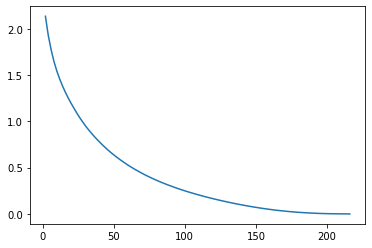

In [88]:
plt.plot(n_components_x, ica_reconstruction_error)

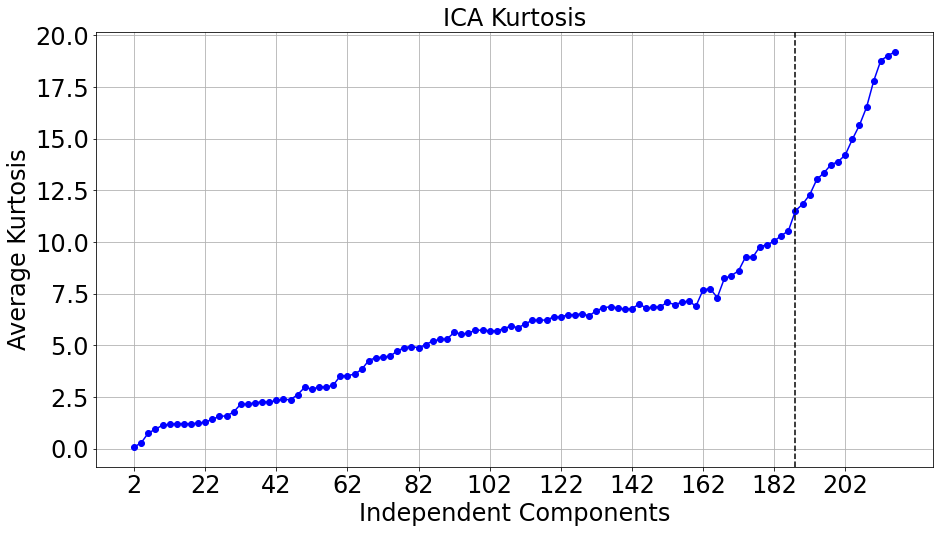

In [109]:
plt.figure(figsize=default_figure_size)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title("ICA Kurtosis", fontsize=fontsize)
plt.xlabel("Independent Components", fontsize=fontsize)
plt.ylabel("Average Kurtosis", fontsize=fontsize)
plt.plot(n_components_x, kurtosis, 'bo-')
plt.axvline(x=188, color='k', linestyle='--', label="k = {}".format(140))
plt.xticks(n_components_x[::10])
plt.grid(True)
plt.show()

In [110]:
best_ica_components=188
ica = FastICA(random_state=42, max_iter=500)
ica.set_params(n_components=best_ica_components)
X_train_faces_ica = ica.fit_transform(X_train_faces)
X_train_faces_ica_df = pd.DataFrame(X_train_faces_ica)
ica_kurt = X_train_faces_ica_df.kurt(axis=0)


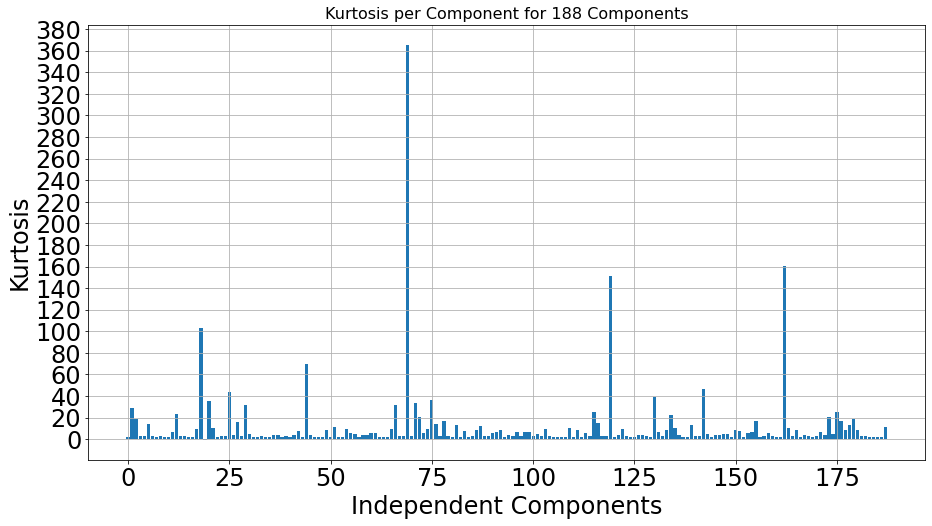

In [111]:
plt.figure(figsize=default_figure_size)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.bar(x=[i for i in range(best_ica_components)], height=ica_kurt)
plt.yticks([i for i in range(0, int(max(ica_kurt) + 22), 20)])
plt.xlabel("Independent Components", fontsize=fontsize)
plt.ylabel("Kurtosis", fontsize=fontsize)
plt.title("Kurtosis per Component for {} Components".format(best_ica_components), fontsize=16)

plt.grid()


/media/richard/Data/CloudStation/Masters Degree/GATechOMSCS_CourseWork/CS7641-Machine_Learning/UnsupervisedLearning_Project_Code/common.py:484: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4ad5572520> has a label of '_line1' which cannot be automatically added to the legend.
  ax2.bar(x=[i for i in range(1, best_n_components+1)], height=best_kurtosis)


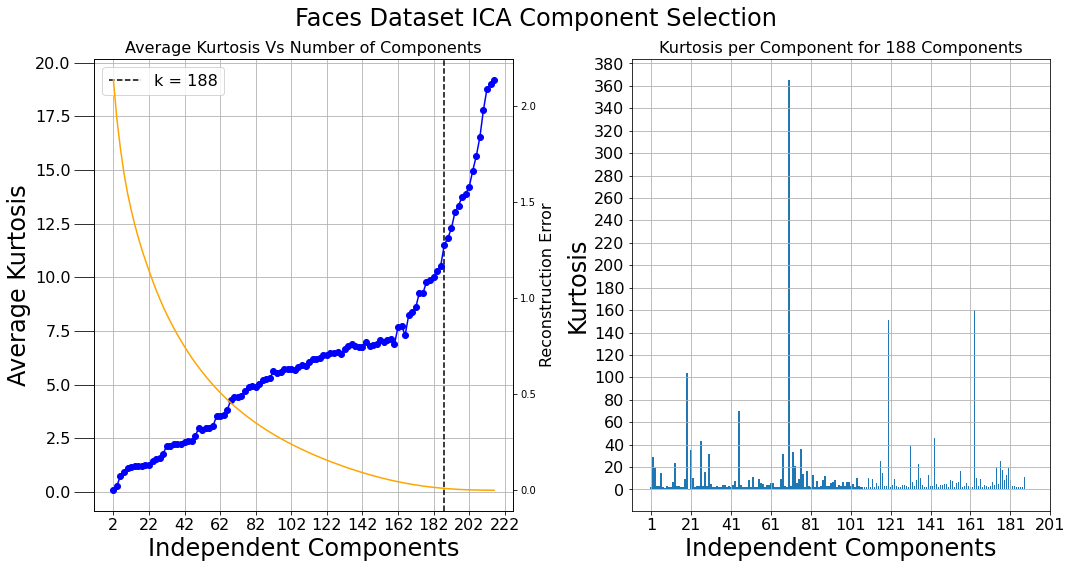

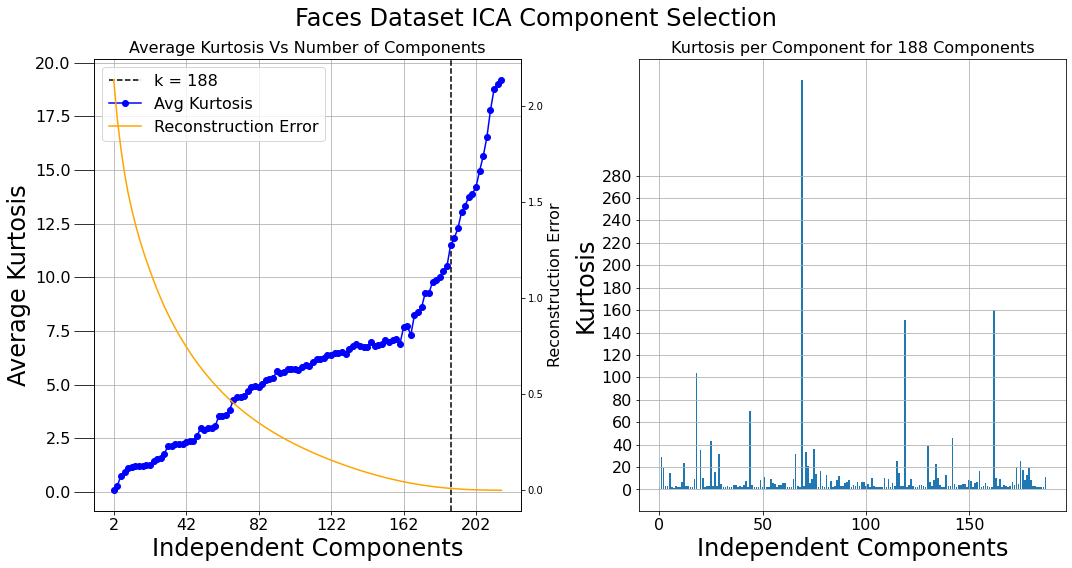

In [112]:
def plot_ica_selection(x, kurtosis, best_n_components, best_kurtosis, DATASET, ica_reconstruction_error=None):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=default_figure_size, sharey=False)
    fig.suptitle("{} Dataset ICA Component Selection".format(DATASET), fontsize=fontsize)

    p1 = ax1.axvline(x=best_n_components, color='k', linestyle='--', label="k = {}".format(best_n_components))

    ax1.set_xlabel("Independent Components", fontsize=fontsize)
    ax1.set_ylabel("Average Kurtosis", fontsize=fontsize)
    p2, = ax1.plot(x, kurtosis, 'bo-', label="Avg Kurtosis")
    ax1.xaxis.set_ticks(x[::20])
    plt.grid(True)

    ax1.tick_params(axis='y', size=20)
    ax1.tick_params(labelsize=16)
#     ax1.yaxis.set_ticks([i for i in np.arange(0,1.1,0.1)])
    ax1.grid(True)
    ax1.set_title("Average Kurtosis Vs Number of Components", fontsize=16)
    
    if ica_reconstruction_error is not None:
        par1 = ax1.twinx()
        p3, = par1.plot(n_components_x, ica_reconstruction_error, color="orange", label="Reconstruction Error")
        par1.set_ylabel("Reconstruction Error", fontsize=16)

    lines = [p1, p2, p3]
    ax1.legend(lines, [l.get_label() for l in lines], loc='best', fontsize=16)
    
    ax2.bar(x=[i for i in range(best_n_components)], height=best_kurtosis)
    ax2.set_xlabel("Independent Components", fontsize=fontsize)
    ax2.set_ylabel("Kurtosis", fontsize=fontsize)

    ax2.set_yticks([i for i in range(0, 300, 20)])
    ax2.tick_params(labelsize=16)
    ax2.grid(True)
    ax2.set_title("Kurtosis per Component for {} Components".format(best_n_components), fontsize=16)

#     ax1.legend(loc='best', fontsize=16)
    plt.tight_layout()
    plt.show()

reload(common)
common.plot_ica_selection(n_components_x, kurtosis, best_ica_components, ica_kurt, DATASET, ica_reconstruction_error=ica_reconstruction_error)
plot_ica_selection(n_components_x, kurtosis, best_ica_components, ica_kurt, DATASET, ica_reconstruction_error)

In [113]:
for i in range(20):
    print("{} limit = {} components".format(i, len(ica_kurt[ica_kurt>i])))


0 limit = 187 components
1 limit = 187 components
2 limit = 182 components
3 limit = 109 components
4 limit = 86 components
5 limit = 75 components
6 limit = 67 components
7 limit = 59 components
8 limit = 54 components
9 limit = 45 components
10 limit = 39 components
11 limit = 34 components
12 limit = 33 components
13 limit = 31 components
14 limit = 28 components
15 limit = 26 components
16 limit = 25 components
17 limit = 23 components
18 limit = 22 components
19 limit = 21 components


In [116]:
from sklearn import random_projection

reconstruction_errors = []
random_states=[]

for state in range(1,11):
    state_reconstruction_error = []
    for n in n_components_x:
        transformer = random_projection.GaussianRandomProjection(n_components=n, random_state=state)
        X_new = transformer.fit_transform(X_train_faces)

        # https://piazza.com/class/kjwtraqiv511du?cid=623_f43
        transformed_data = transformer.fit_transform(X_train_faces)
        inverse_data = np.linalg.pinv(transformer.components_.T)
        reconstructed_data = transformed_data.dot(inverse_data)

        state_reconstruction_error.append(np.sum(((X_train_faces - reconstructed_data) ** 2).mean()))
    reconstruction_errors.append(state_reconstruction_error)
    random_states.append(state)

    


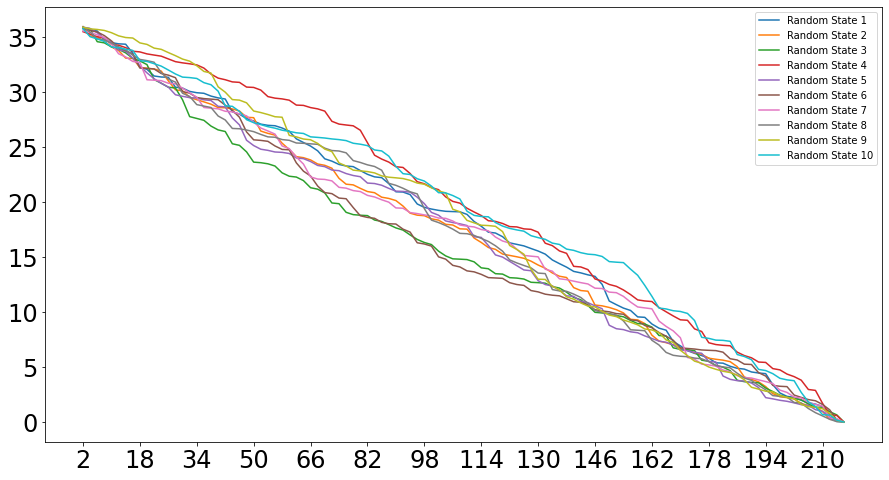

54

In [123]:
plt.figure(figsize=default_figure_size)
plt.xticks(n_components_x[::8], fontsize=fontsize)
plt.yticks(fontsize=fontsize)
for reconstruction_error, state in zip(reconstruction_errors, random_states):
    plt.plot(n_components_x, reconstruction_error, label="Random State {}".format(state))


plt.legend()
plt.show()

num_features//4

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

base_estimator=tree.DecisionTreeClassifier(ccp_alpha=0.002, max_depth=1)
final_params={'base_estimator': base_estimator, 'learning_rate': 0.22, 'n_estimators': 15}
clf = AdaBoostClassifier(**final_params)
clf.fit(X_train_faces, y_train_faces['sex'])
print("Train Accuracy: {}%".format(round(clf.score(X_train_faces, y_train_faces['sex'])*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test_faces, y_test_faces['sex'])*100, 1)))

Train Accuracy: 72.7%
Test Accuracy: 73.1%


[]

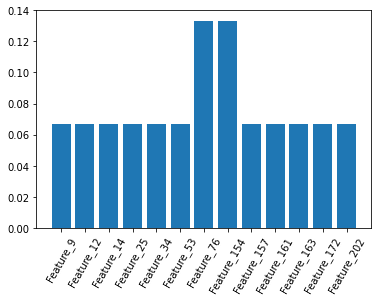

In [125]:
plt.bar(x=X_train_faces.columns[clf.feature_importances_ > 0], height=clf.feature_importances_[clf.feature_importances_>0])
plt.xticks(rotation=60)
plt.plot()

In [126]:
X_train_faces.columns[clf.feature_importances_>0]
print(len(X_train_faces.columns[clf.feature_importances_>0]))

13


In [128]:
X_train_faces[X_train_faces.columns[clf.feature_importances_>0]]


,Feature_9,Feature_12,Feature_14,Feature_25,Feature_34,Feature_53,Feature_76,Feature_154,Feature_157,Feature_161,Feature_163,Feature_172,Feature_202
852,0.429974,0.416881,0.416881,0.408248,0.472237,0.395169,0.161495,0.446610,0.045273,0.170466,0.471526,0.284402,0.114282
491,0.146344,0.483707,0.238669,0.346120,0.563337,0.140121,0.272657,0.483046,0.176263,0.130708,0.471713,0.195341,0.083512
2789,0.418801,0.408440,0.408440,0.408248,0.408248,0.444553,0.435980,0.408248,0.196905,0.242437,0.533500,0.273396,0.338757
296,0.408248,0.418865,0.441976,0.408248,0.431529,0.408248,0.192858,0.408248,0.410522,0.443367,0.435889,0.181705,0.430357
717,0.086847,0.623929,0.165769,0.423448,0.508060,0.434146,0.087711,0.523565,0.202130,0.459305,0.436379,0.329649,0.298346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,0.126466,0.229248,0.527389,0.290457,0.316031,0.408248,0.299816,0.408248,0.554166,0.149771,0.361642,0.408248,0.408129
2613,0.535897,0.277129,0.337960,0.408248,0.445579,0.467887,0.253052,0.635655,0.336428,0.253436,0.159186,0.267141,0.044363
219,0.426107,0.419639,0.452294,0.183588,0.522051,0.434512,0.508793,0.276903,0.502870,0.165599,0.461021,0.417742,0.485890
739,0.408248,0.417048,0.417048,0.380775,0.233687,0.520805,0.330253,0.433744,0.552324,0.160886,0.135769,0.416033,0.365859
